###**Automation Anxiety: Is Automation Really Replacing Human Employment?**

Final Data Science Tutorial - CMPS 3160-01 - Introduction to Data Science - Professor Faust

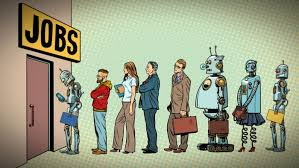


This tutorial is presented/created by Arieana Talavera and Kathryn Sullivan.

#Background & Motivation
"AI is going to take your job” has become a buzz-phrase that fuels public anxiety, but it’s not clear whether automation is actually reducing employment or if the fear is overstated. With AI and automation increasing rapidly in upcoming years it is understandable to have that thought that one day you will be replaced but we are here to really find out if that is the case currently.

We will conduct a review of automation anxiety in the economy by analyzing aspects such as how rising productivity and technological investment influence employment levels and job creation/loss over time.

#Questions to Ponder

Is there a current rise or fall in automation-related spending? Does this correlate positively or negatively or not at all with employment levels?

Are there any correlated peaks or major drops in all of the series and if there are is it due to an event that occured such as the launch of a new technology or a financial crisis?

*How are rising productivity levels and increases in automation-related spending influencing overall employment in the US and do these trends suggest that technological innovation is supporting job growth or contributing to job displacement over time?*

This last question will be our focus for this overview.

This is our [GitHub website]()


**Time for Data**

---



#Extraction

---



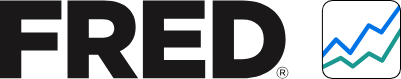

We pulled our data off of FRED, since Kathryn was familiar with pulling data from there from other classes & FRED is known to be beginner friendly with their webstie, if you want to check it [out](https://fred.stlouisfed.org/). We chose 3 datasets listed below and first uploaded the data from FRED into our notebook. For one series we did have to transform the series from being monthly to quarterly. We then turned this data to have four columns with each column having a variable assigned to it for easy access. The first was date, the second was PAYEMS, then OPHNFB and finally PNFI. We chose also to do the data range of 1980 to 2025 because we felt that this was the most pivotal times in technology, specifically automation due to the rise of computers in the 90's. Below we have listed each series, a brief description (based off the Read_Me sections from FRED), how we used it and what we named it which can be seen in our data cleaning and tidying section.

#Series 1: All Employees, Total Nonfarm Payroll (PAYEMS)
- Link: [All Employees, Total Nonfarm (PAYEMS) | FRED | St. Louis Fed](https://fred.stlouisfed.org/series/PAYEMS)
- Description: Measure of the number of U.S. workers in the economy (excludes proprietors, private household employees, unpaid volunteers, farm employees, and the unincorporated self-employed.)
- Frequency: Monthly (will need to transform to quarterly by exporting it to excel and cleaning it)
- Units: Thousands of Persons
- What we will use it for: show if jobs are keeping up with productivity, if it is then innovation is supporting employment, if not than innovation is decreasing employment
- Our name: num_workers

# Series 2: Nonfarm Business Sector: Labor Productivity (Output per Hour) for All Workers (OPHNFB)
- Link: [Nonfarm Business Sector: Labor Productivity (Output per Hour) for All Workers (OPHNFB) | FRED | St. Louis Fed](https://fred.stlouisfed.org/series/OPHNFB)
- Description: the amount of goods and services produced per hour of labor
- Units: Index, base year 2017 = 100
- Frequency: Quarterly
- What we will use it for: this will show the efficiency gained from tech adaption. If there is a rise in productivity without a corresponding rise in the employee series than we can see that the growth is driven by automation not employment
- Our name: productivity

#Series 3: Private Nonresidential Fixed Investment (PNFI)
- Link: [Private Nonresidential Fixed Investment (PNFI) | FRED | St. Louis Fed](https://fred.stlouisfed.org/series/PNFI)
- Description: Business’s investment in physical assets such as buildings, machinery, technology infrastructure, and software
- Units: Billions of $
- Frequency: Quarterly
- What will we use it for: proxy for automation spending. If there is a positive correlation between a rise of productivity and automation spending but no rise in employment can infer that the rise in productivity is due to investing in new tech, not a rise in employment
- Our name: aut_spending (short for automation spending)


In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The first step to working with code is loading in our dataset for the platform we’re using. After loading the libraries needed for this project, we’ll address any formatting issues that appear which is purely for visual aspects and display the resulting data. Each step in the code will be walked-through as it occurs.

#Load

---



When loading in the libraries we will load pandas as pd and the file type we are reading in is a csv. This simply means when we are reading the data in we will state "_pd.read_csv_".
This function tells Pandas to read a Comma Separated Values (CSV) file type!

In [36]:
#Let's import PAYEMS from repo
#First we should load the 'pandas' library
import pandas as pd

#Get raw url from github repo
payems_url = "https://raw.githubusercontent.com/arieanatalavera/arieanatalavera.github.io/refs/heads/main/PAYEMS.csv"

#Load raw file and parse using date
payems = pd.read_csv(payems_url, parse_dates=["observation_date"])
payems = payems.set_index("observation_date").sort_index()

#Check to see if we were successful
print("Raw PAYEMS Data:")
print(payems.head())
print(payems.tail())


Raw PAYEMS Data:
                  PAYEMS
observation_date        
1939-01-01         29923
1939-02-01         30100
1939-03-01         30280
1939-04-01         30094
1939-05-01         30299
                  PAYEMS
observation_date        
2025-04-01        159433
2025-05-01        159452
2025-06-01        159439
2025-07-01        159518
2025-08-01        159540


That makes dataset 1 of 3 loaded. But we need all three to continue - this means we need to keep creating variables for each dataset which we can reference too later once we need to use the data.

In [37]:
#Import OPHNFB from repo

#Get raw url from github repo
url_ophnfb = "https://raw.githubusercontent.com/arieanatalavera/arieanatalavera.github.io/refs/heads/main/OPHNFB.csv"

#Load raw file and parse using date
ophnfb = pd.read_csv(url_ophnfb, parse_dates=["observation_date"])
ophnfb = ophnfb.set_index("observation_date").sort_index()

#Check for success
print("Raw OPHNFB Data:")
print(ophnfb.head())
print(ophnfb.tail())

Raw OPHNFB Data:
                  OPHNFB
observation_date        
1947-01-01        22.256
1947-04-01        22.762
1947-07-01        22.065
1947-10-01        22.993
1948-01-01        23.097
                   OPHNFB
observation_date         
2024-04-01        114.430
2024-07-01        115.241
2024-10-01        115.725
2025-01-01        115.206
2025-04-01        116.143


Lets load in the Private Nonresidential Fixed Investment (PNFI) series last.

In [38]:
#Load PNFI from repo

#Let's get the raw url from github repo
url_pnfi = "https://raw.githubusercontent.com/arieanatalavera/arieanatalavera.github.io/refs/heads/main/PNFI.csv"

#Load in the raw file and parse using the date
pnfi = pd.read_csv(url_pnfi, parse_dates=["observation_date"])
pnfi = pnfi.set_index("observation_date").sort_index()

#Check again if we were successful
print("Raw PNFI Data:")
print(pnfi.head())
print(pnfi.tail())


Raw PNFI Data:
                    PNFI
observation_date        
1947-01-01        24.818
1947-04-01        25.171
1947-07-01        25.361
1947-10-01        26.540
1948-01-01        28.231
                      PNFI
observation_date          
2024-04-01        4012.411
2024-07-01        4069.186
2024-10-01        4046.390
2025-01-01        4137.819
2025-04-01        4207.512


# Transforming/Tidying

---


Now that we have all the raw csv files downloaded from fred into our repo and uploaded to our collab, lets clean them so all the datasets uniformally have a date range from 1980 to 2025 and are quarterly. It is important to have tidy data because overall it makes analysis correct, and models reliable.

In [39]:
#Let's clean up PAYEMS

#Date Range 1980 to 2024
payems_clean = payems.loc["1980-01-01" : "2024-12-31"]

#Convert annual data to quarterly data
series_name = payems_clean.columns[0]
payems_quarterly = payems_clean.resample("QE")[series_name].mean()

payems_quarterly = payems_quarterly.to_frame(name=series_name)
payems_quarterly = payems_quarterly.loc["1980-01-01" : "2024-12-31"]

#Check
print("PAYEMS Quarterly (1980–2025):")
print(payems_quarterly.head())
print(payems_quarterly.tail())

PAYEMS Quarterly (1980–2025):
                        PAYEMS
observation_date              
1980-03-31        90892.333333
1980-06-30        90456.666667
1980-09-30        90050.666667
1980-12-31        90726.666667
1981-03-31        91116.000000
                         PAYEMS
observation_date               
2023-12-31        156703.666667
2024-03-31        157279.000000
2024-06-30        157792.666667
2024-09-30        158130.333333
2024-12-31        158639.666667


In [40]:
#Clean OPHNFB

#Ensure date range
ophnfb_clean = ophnfb.loc["1980-01-01" : "2024-12-31"]

#Ensure quarterly
series_name = ophnfb_clean.columns[0]
ophnfb_quarterly = ophnfb_clean.resample("Q")[series_name].mean()

ophnfb_quarterly = ophnfb_quarterly.to_frame(name=series_name)
ophnfb_quarterly = ophnfb_quarterly.loc["1980-01-01" : "2024-12-31"]

#Check
print("OPHNFB Quarterly (1980–2024):")
print(ophnfb_quarterly.head())
print(ophnfb_quarterly.tail())


OPHNFB Quarterly (1980–2024):
                  OPHNFB
observation_date        
1980-03-31        49.639
1980-06-30        49.122
1980-09-30        49.316
1980-12-31        49.817
1981-03-31        50.584
                   OPHNFB
observation_date         
2023-12-31        113.391
2024-03-31        113.845
2024-06-30        114.430
2024-09-30        115.241
2024-12-31        115.725


/tmp/ipython-input-3707002446.py:8: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  ophnfb_quarterly = ophnfb_clean.resample("Q")[series_name].mean()


In [41]:
#Clean PNFI

#Date range
pnfi_clean = pnfi.loc["1980-01-01" : "2024-12-31"]

#Ensure quarterly
series_name = pnfi_clean.columns[0]
pnfi_quarterly = pnfi_clean.resample("Q")[series_name].mean()

pnfi_quarterly = pnfi_quarterly.to_frame(name=series_name)
pnfi_quarterly = pnfi_quarterly.loc["1980-01-01" : "2024-12-31"]

#Check
print("PNFI Quarterly (1980–2024):")
print(pnfi_quarterly.head())
print(pnfi_quarterly.tail())


PNFI Quarterly (1980–2024):
                     PNFI
observation_date         
1980-03-31        404.492
1980-06-30        394.680
1980-09-30        405.717
1980-12-31        422.755
1981-03-31        443.025
                      PNFI
observation_date          
2023-12-31        3941.343
2024-03-31        3963.752
2024-06-30        4012.411
2024-09-30        4069.186
2024-12-31        4046.390


/tmp/ipython-input-3493099961.py:8: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  pnfi_quarterly = pnfi_clean.resample("Q")[series_name].mean()


Now we have all three datasets cleaned up but before we will begin merging them. But first we need to ensure all the lengths of the datasets are the same and make sure the date index is the same. We don't want unaligned data.

In [42]:
#Check if all the same length
print(len(payems_quarterly))
print(len(ophnfb_quarterly))
print(len(pnfi_quarterly))

#Check if Date Index
print(payems_quarterly.index.min(), payems_quarterly.index.max())
print(ophnfb_quarterly.index.min(), ophnfb_quarterly.index.max())
print(pnfi_quarterly.index.min(), pnfi_quarterly.index.max())


180
180
180
1980-03-31 00:00:00 2024-12-31 00:00:00
1980-03-31 00:00:00 2024-12-31 00:00:00
1980-03-31 00:00:00 2024-12-31 00:00:00


Next step is to merge the data into one dataset so we can do summary statistics!

In [43]:
#Merge
merged = pd.concat(
    [payems_quarterly, ophnfb_quarterly, pnfi_quarterly],
    axis=1
)

print("Merged dataset:")
print(merged.head())
print(merged.tail())


Merged dataset:
                        PAYEMS  OPHNFB     PNFI
observation_date                               
1980-03-31        90892.333333  49.639  404.492
1980-06-30        90456.666667  49.122  394.680
1980-09-30        90050.666667  49.316  405.717
1980-12-31        90726.666667  49.817  422.755
1981-03-31        91116.000000  50.584  443.025
                         PAYEMS   OPHNFB      PNFI
observation_date                                  
2023-12-31        156703.666667  113.391  3941.343
2024-03-31        157279.000000  113.845  3963.752
2024-06-30        157792.666667  114.430  4012.411
2024-09-30        158130.333333  115.241  4069.186
2024-12-31        158639.666667  115.725  4046.390


#Summary Statistics

---


These summary statitics gives a better understanding of key points in our data.

This first summary statistic we will be implementing is a correlation matrix. Correlation matrixs are important because they show how strongly variables move together, revealing relationships.

In [44]:
#1) Correlation Matrix
corr_matrix = merged.corr()

print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
          PAYEMS    OPHNFB      PNFI
PAYEMS  1.000000  0.942282  0.926614
OPHNFB  0.942282  1.000000  0.963803
PNFI    0.926614  0.963803  1.000000


**Correlation Analysis:**
The correlations are all extremely high and positive, which makes sense because these macro variables tend to move together over time. Employment (PAYEMS) is very closely tied to both productivity (OPHNFB) and investment (PNFI), and productivity and investment have the strongest relationship of all. Overall, this just shows that as the economy grows, all three series rise together.



Our second summary statistic we are implenting into the workbook is Skew. Skew is important in showing if our data is balanced and whether you can trust traditional statistical measures.

In [45]:
#2) Skew
skew_values = merged.skew()
print("Skewness:")
print(skew_values)

Skewness:
PAYEMS   -0.335278
OPHNFB    0.173471
PNFI      0.731355
dtype: float64


**Skew:**
PAYEMS has a slightly negative skew, which means the distribution leans a bit toward lower values. That makes sense because employment tends to fall sharply during recessions. OPHNFB is basically symmetric with only a small positive skew. PNFI has the strongest positive skew, which fits investment data since a few periods of very high investment pull the average upward. Overall, the skew values are pretty mild, but PNFI is the most right-tailed.

Our third summary statistic we are added is percent change.

In [46]:
#3) Quarterly percent change
pct_change = merged.pct_change() * 100

# Average quarterly percent change for each series
avg_qtr_change = pct_change.mean()

print("Average Quarterly Percent Change:")
print(avg_qtr_change)

Average Quarterly Percent Change:
PAYEMS    0.317895
OPHNFB    0.476811
PNFI      1.316976
dtype: float64


**Quarterly Growth:**
On average, all three variables grow each quarter, but at different speeds. PAYEMS grows the slowest at around 0.32 percent per quarter, which makes sense because employment usually changes gradually. OPHNFB grows a bit faster at about 0.48 percent, showing steady productivity gains over time. PNFI grows the fastest by far at around 1.32 percent per quarter, which reflects how investment tends to be more volatile and responsive to changes in economic conditions. Overall, the percent changes line up with what you would expect from these types of macroeconomic series.

#Graphs

---



We next wanted to add a graph to show the data we just recieved for average quarterly percent change. We will use a bargraph first.

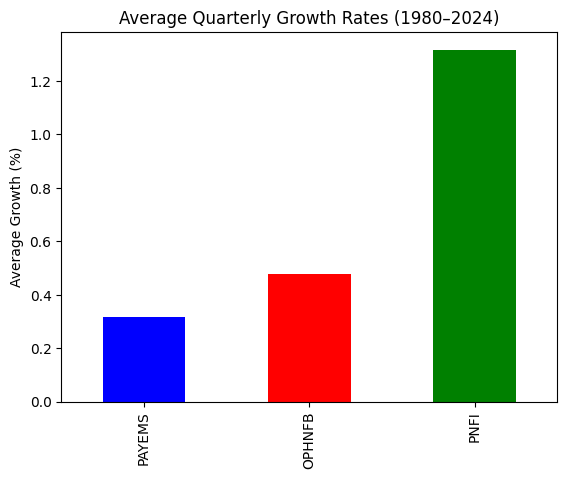

In [47]:
import matplotlib.pyplot as plt

# Use the average percent change series you computed
growth = avg_qtr_change

# Create bar plot
growth.plot(kind="bar", color=["blue", "red", "green"])

# Add title and labels
plt.title("Average Quarterly Growth Rates (1980–2024)")
plt.ylabel("Average Growth (%)")

# Display the plot
plt.show()


**Relevance of Graph:**
This suggests association automation spending is growing much faster than jobs and productivity. This is relevant because it supports the idea of automation anxiety where technology investments are increasing but employment is not keeping up with it.




Next, we will use a Time Series Line Plot.

Text(0, 0.5, 'Levels')

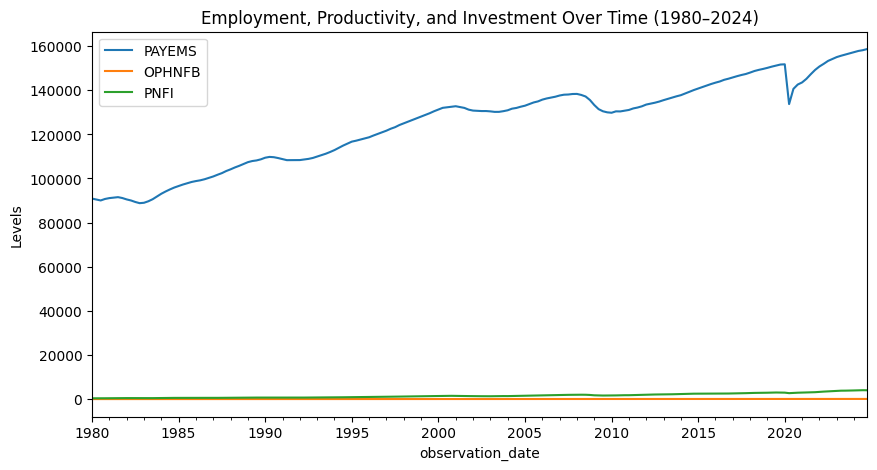

In [48]:
merged.plot(figsize=(10,5))
plt.title("Employment, Productivity, and Investment Over Time (1980–2024)")
plt.ylabel("Levels")

This graph shows the long-run upward trends in all three variables. You can see from the graph that productivity and investment rise faster than employment, which is consistent with how automation and technology scale faster than labor. This gives important context for our key automation question, because we can visually compare how these trends move together over several decades.

We also added a Quarterly Percent Change Line Plot!

Text(0, 0.5, '% Change')

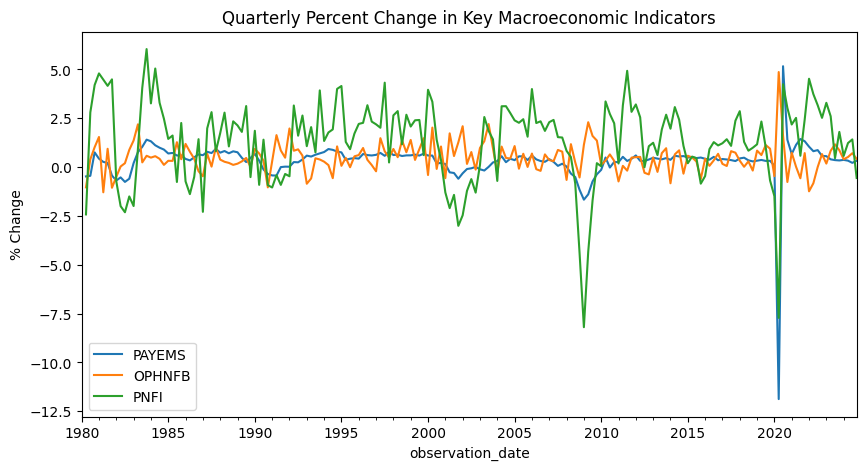

In [49]:
pct_change.plot(figsize=(10,5))
plt.title("Quarterly Percent Change in Key Macroeconomic Indicators")
plt.ylabel("% Change")

Wow, look at that graph! Looks a bit crazy, but it can tell us important things. The percent change chart shows that investment is much more volatile than employment or productivity. This is meaningful because it highlights that automation-related spending reacts quickly to economic shifts, while employment moves more slowly. This helps us think about whether automation shocks immediately show up in job numbers.

Our next few graphs are Scatterplots. Scatterplots are related to correlation and can show us the relationship between variables better.


Text(0.5, 1.0, 'Productivity vs Employment')

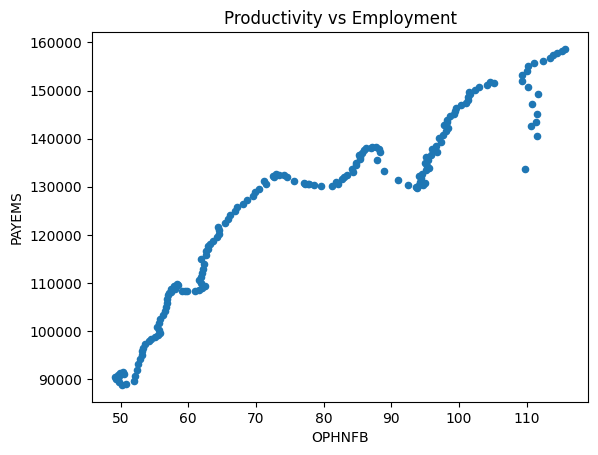

In [50]:
merged.plot.scatter(x="OPHNFB", y="PAYEMS")
plt.title("Productivity vs Employment")

This is showing us a strong positive relationship between productivity and employment. Higher productivity tends to occur when more people are employed, which goes against the narrative that rising productivity automatically replaces workers.

Next Scatterplot in line:

Text(0.5, 1.0, 'Investment vs Employment')

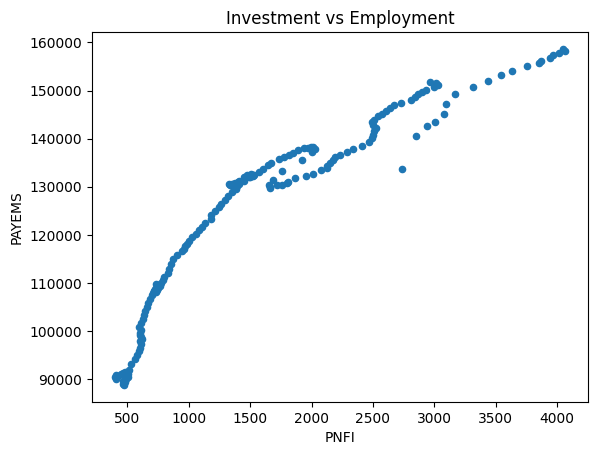

In [51]:
merged.plot.scatter(x="PNFI", y="PAYEMS")
plt.title("Investment vs Employment")

This graph shows that investment and employment also rise together. When companies spend more on equipment, technology, or automation, employment is generally higher—not lower. This supports our focus question on whether automation complements labor rather than replacing it.

Next graph is what we called another Bar Chart. It has all the decades shown so we can analyze which decade showed the most  increase on average in each 3 of our variables.

Text(0, 0.5, 'Average Level')

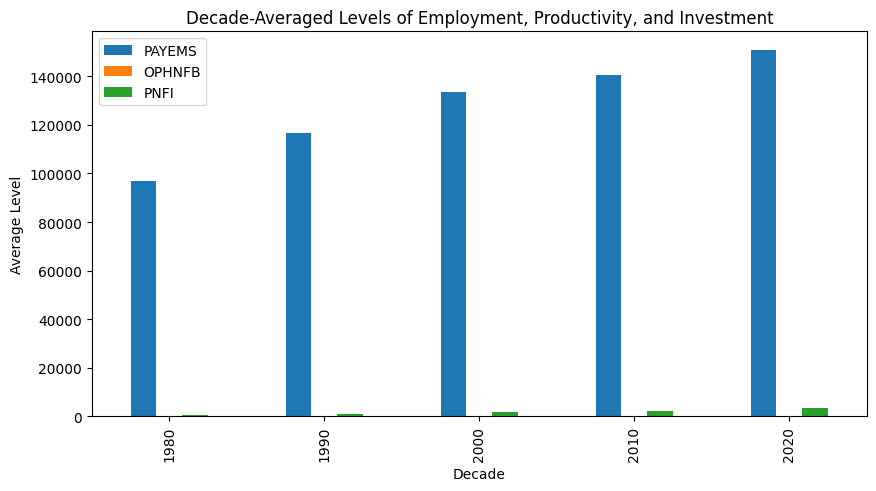

In [52]:
merged['Decade'] = (merged.index.year // 10) * 10
decade_means = merged.groupby('Decade').mean()

decade_means[['PAYEMS','OPHNFB','PNFI']].plot(kind='bar', figsize=(10,5))
plt.title("Decade-Averaged Levels of Employment, Productivity, and Investment")
plt.ylabel("Average Level")

Stated before this bar chart compares average employment, productivity, and investment across decades. It shows how each decade has seen increases in productivity and investment, while employment steadily rises. This gives a broader sense of how structural economic changes align with the rise of automation.

Before we get into our model lets run one last summary statistic table. This table provides baseline scale and variability for each variable before modeling.


In [53]:
merged.describe()

,PAYEMS,OPHNFB,PNFI,Decade
count,180.000000,180.000000,180.000000,180.000000
mean,125095.718519,78.349533,1616.551761,1997.777778
std,19338.555125,20.363618,969.286229,13.183516
min,88821.333333,49.122000,394.680000,1980.000000
25%,108762.250000,58.920000,733.377250,1990.000000
50%,130561.000000,77.504000,1428.658000,2000.000000
75%,137989.916667,95.867000,2245.704500,2010.000000
max,158639.666667,115.725000,4069.186000,2020.000000


#**Time to run our Model!**  

---
This will be a regression model which will be testing whether quarterly changes in productivity and investment help predict changes in employment. This will help quantify whether automation complements or replaces labor. The main question at hand!



Model Assumptions/L:

This model assumes a linear relationship between automation investment, productivity, and employment. While lagged variables help capture delayed labor responses to automation, the analysis does not account for every possible economic factor, so the results should be interpreted as associations rather than strict causal effects.

This is an optional step but we chose to rename Data Columns for easier use, as in the beginning we stated what our variable names will be, that is what we are using here.


In [54]:
merged = merged.rename(columns={
    "PAYEMS": "num_workers",
    "OPHNFB": "productivity",
    "PNFI": "aut_spending"
})

merged.head()


,num_workers,productivity,aut_spending,Decade
observation_date,,,,
1980-03-31,90892.333333,49.639,404.492,1980
1980-06-30,90456.666667,49.122,394.680,1980
1980-09-30,90050.666667,49.316,405.717,1980
1980-12-31,90726.666667,49.817,422.755,1980
1981-03-31,91116.000000,50.584,443.025,1980


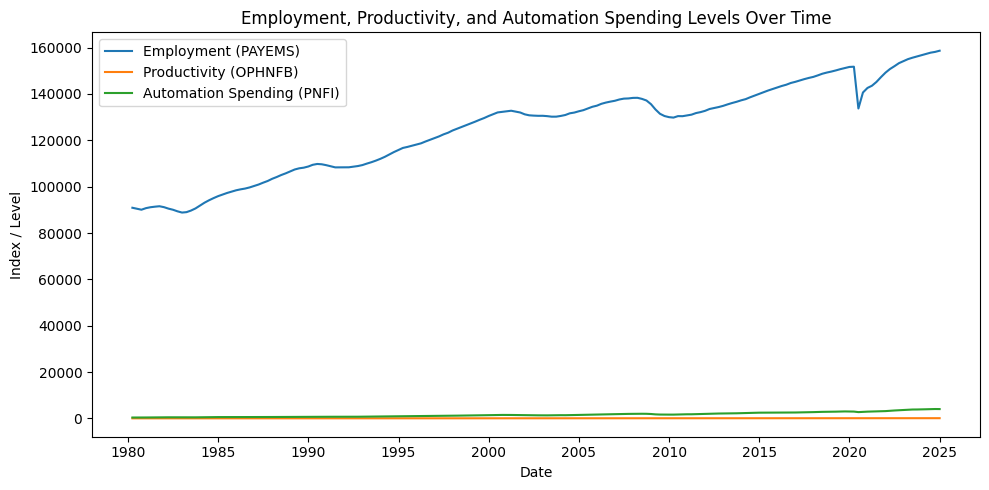

In [55]:
plt.figure(figsize=(10,5))

plt.plot(merged.index, merged['num_workers'], label='Employment (PAYEMS)')
plt.plot(merged.index, merged['productivity'], label='Productivity (OPHNFB)')
plt.plot(merged.index, merged['aut_spending'], label='Automation Spending (PNFI)')

plt.title("Employment, Productivity, and Automation Spending Levels Over Time")
plt.xlabel("Date")
plt.ylabel("Index / Level")
plt.legend()
plt.tight_layout()
plt.show()


Let's create a new DataFrame for the regression model.

In [56]:
merged_reg = merged.copy()

Create quarterly changes.

We computed quarterly changes for employment, productivity, and automation spending.

In [57]:
merged_reg['d_emp']  = merged_reg['num_workers'].diff()
merged_reg['d_prod'] = merged_reg['productivity'].diff()
merged_reg['d_auto'] = merged_reg['aut_spending'].diff()

We are going to create what is known as lagged variables, then we create lagged quarterly changes to test delayed automation effects.

In [58]:
merged_reg['d_prod_l1'] = merged_reg['d_prod'].shift(1)
merged_reg['d_auto_l1'] = merged_reg['d_auto'].shift(1)

We are going to drop the NaNs from our variable merged_reg just to clean up the data and have no issues with data reading.

In [59]:
merged_reg = merged_reg.dropna()

print("Final number of rows in merged_reg:", len(merged_reg))
merged_reg.head()

Final number of rows in merged_reg: 178


,num_workers,productivity,aut_spending,Decade,d_emp,d_prod,d_auto,d_prod_l1,d_auto_l1
observation_date,,,,,,,,,
1980-09-30,90050.666667,49.316,405.717,1980,-406.000000,0.194,11.037,-0.517,-9.812
1980-12-31,90726.666667,49.817,422.755,1980,676.000000,0.501,17.038,0.194,11.037
1981-03-31,91116.000000,50.584,443.025,1980,389.333333,0.767,20.270,0.501,17.038
1981-06-30,91356.333333,49.930,462.864,1980,240.333333,-0.654,19.839,0.767,20.270
1981-09-30,91547.666667,50.397,482.109,1980,191.333333,0.467,19.245,-0.654,19.839


Let's set up the regression!
We prepare the X and y variables for the regression.
Also we are going to import a new library called statmodels.api to help make this easier.

In [60]:
import statsmodels.api as sm

y = merged_reg['d_emp']
X = merged_reg[['d_prod', 'd_auto', 'd_prod_l1', 'd_auto_l1']]
X = sm.add_constant(X)

Time to run the regression!

In [61]:
model_lagged = sm.OLS(y, X).fit()
print(model_lagged.summary())


                            OLS Regression Results                            
Dep. Variable:                  d_emp   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     80.65
Date:                Fri, 12 Dec 2025   Prob (F-statistic):           1.66e-38
Time:                        01:51:15   Log-Likelihood:                -1469.2
No. Observations:                 178   AIC:                             2948.
Df Residuals:                     173   BIC:                             2964.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        350.8167    113.600      3.088      0.0

Let's set up our variables to be used in the model plots below.

In [62]:
import matplotlib.pyplot as plt

# X and y used in our regression
y = merged_reg["d_emp"]
X = merged_reg[["d_prod", "d_auto", "d_prod_l1", "d_auto_l1"]]
X = sm.add_constant(X)

model_lagged = sm.OLS(y, X).fit()

# Add predictions and residuals to the dataframe
merged_reg["y_hat"] = model_lagged.fittedvalues
merged_reg["resid"] = model_lagged.resid


Now that our variables are ready, lets make some plots.

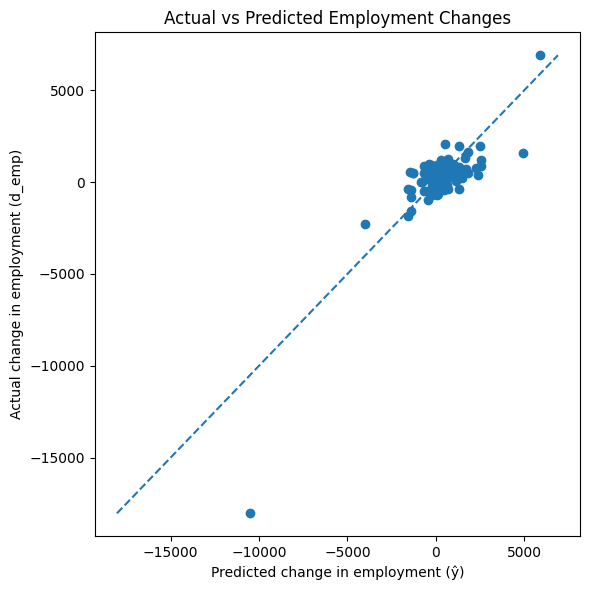

In [63]:
plt.figure(figsize=(6, 6))
plt.scatter(merged_reg["y_hat"], merged_reg["d_emp"])
plt.plot([merged_reg["d_emp"].min(), merged_reg["d_emp"].max()],
         [merged_reg["d_emp"].min(), merged_reg["d_emp"].max()],
         linestyle="--")
plt.xlabel("Predicted change in employment (ŷ)")
plt.ylabel("Actual change in employment (d_emp)")
plt.title("Actual vs Predicted Employment Changes")
plt.tight_layout()
plt.show()


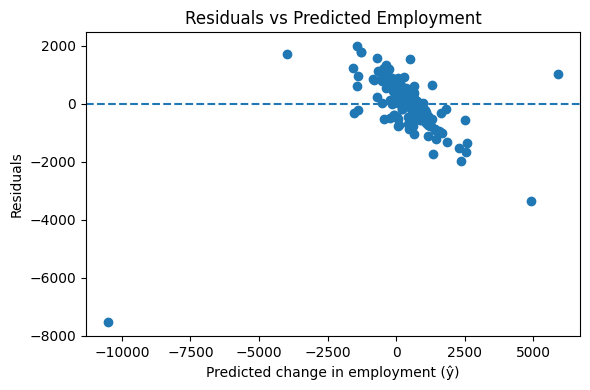

In [64]:
plt.figure(figsize=(6, 4))
plt.scatter(merged_reg["y_hat"], merged_reg["resid"])
plt.axhline(0, linestyle="--")
plt.xlabel("Predicted change in employment (ŷ)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Employment")
plt.tight_layout()
plt.show()


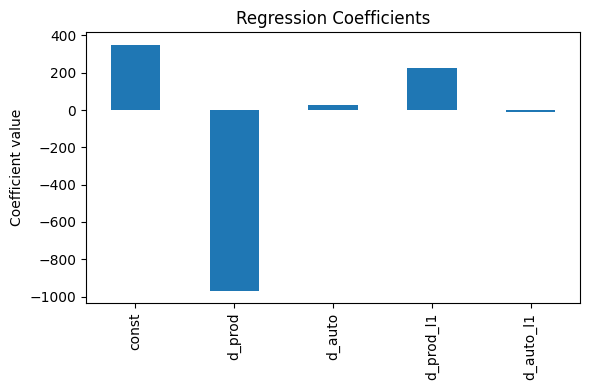

In [65]:
coefs = model_lagged.params

plt.figure(figsize=(6, 4))
coefs.plot(kind="bar")
plt.title("Regression Coefficients")
plt.ylabel("Coefficient value")
plt.tight_layout()
plt.show()


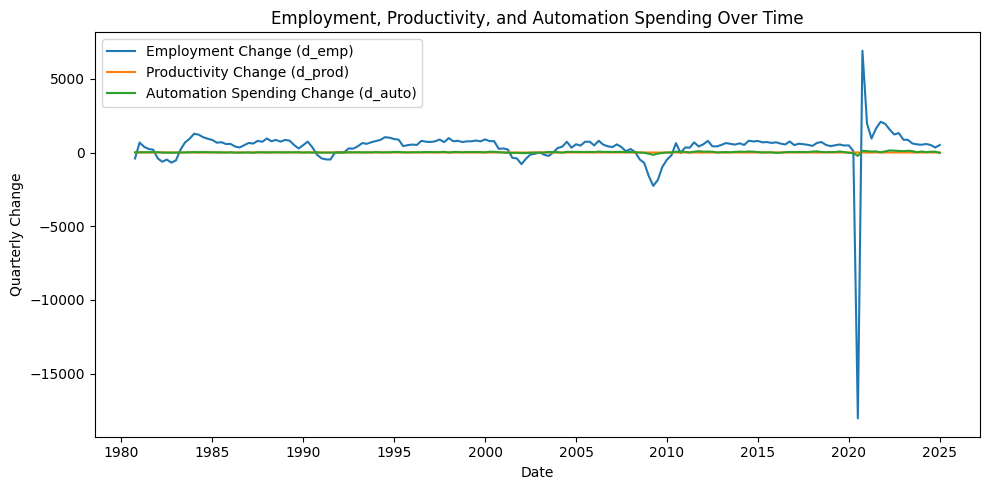

In [66]:
plt.figure(figsize=(10,5))

plt.plot(merged_reg.index, merged_reg['d_emp'], label='Employment Change (d_emp)')
plt.plot(merged_reg.index, merged_reg['d_prod'], label='Productivity Change (d_prod)')
plt.plot(merged_reg.index, merged_reg['d_auto'], label='Automation Spending Change (d_auto)')

plt.title("Employment, Productivity, and Automation Spending Over Time")
plt.xlabel("Date")
plt.ylabel("Quarterly Change")
plt.legend()
plt.tight_layout()
plt.show()


**Let's discuss our Regression Findings**

---

We see Productivity increases lead to immediate job losses. foudn by d_prod coefficient: –968.25 (p < 0.001).

What does this mean?

A 1-unit rise in productivity is associated with ~968 fewer workers that quarter.

We also see that Automation spending increases lead to immediate job gains! Found by d_auto coefficient: +27.80 (p < 0.001)

This means that a 1-unit rise in automation investment is associated with ~28 additional workers that quarter.

We see that lagged automation spending leads to job losses one quarter later. We see this by d_auto_l1 coefficient: –12.55 (p < 0.001)

Interpretation of this is that the previous quarter’s automation spending reduces employment by ~13 workers this quarter.

Lagged productivity shows a mild positive rebound effect seen by d_prod_l1 coefficient: +223.90 (p ≈ 0.07)

Meaning that last quarter’s productivity increases are associated with ~224 more workers this quarter (this is a weak significance though).



Remember our research question we are trying to answer to begin with-

Do quarterly increases in productivity and automation-related investment lead to increases or decreases in U.S. employment?

**Deeper Conclusion from the Regression Results:**

---



Productivity shocks cause immediate job losses (–968.25, p < 0.001).
This means that when productivity jumps—usually because of new technology—employment falls.
→ Which suggests automation replaces workers in the short run.

Automation spending increases employment immediately (+27.80, p < 0.001).
Firms tend to hire during the building, installation, or expansion phase of new technology.
→ Suggesting Automation complements labor in the short run.

But automation spending reduces employment in the following quarter (–12.55, p < 0.001).
After installation is complete and new technology becomes operational, fewer workers are needed.
→ Supporting delayed job displacement. (Which is what people are most likely dissusing about when they think, Automation is taking jobs away!)

Lagged productivity shows a small rebound (+223.90, p ≈ 0.07),
suggesting firms re-hire some workers after the initial shock.

→ So- Short-run disruption, partial medium-run recovery.

**Based on this our overall conclusion!**

---


- **Automation creates short-term disruption (job loss from productivity shocks) and delayed displacement (job loss after automation investment), with small rebound effects.**

**Additional Resources**

---
In case you were ever worried about automation taking your job there are *plently* of resources to read about in this sector. This [article](https://www.sciencedirect.com/science/article/pii/S2667111524000239) here discusses how automation even helps workers become more effiecent! This [article](https://www.lse.ac.uk/study-at-lse/executive-education/insights/articles/no-robots-arent-destroying-half-of-all-jobs) emphasizes 8 really great points as to how automation can't actually take over human's jobs, how you are still needed.
Arguments for job replacment in the past have also been analyzed. [Like this one](https://hai.stanford.edu/news/assessing-the-real-impact-of-automation-on-jobs) discusses concerns before AI became so widespread and uses data up until 2018. The author does a great anaylsis on real-life every day people jobs.


Finally, we want to save our data to our drive for future reference and to save everything! To do that the code is below,

In [67]:
!ls /content/drive/MyDrive

 59B36547-0037-4548-B3FA-3960C19584A6.jpeg
 5D4FFB38-BB59-4C25-8441-558A612FD57F.jpeg
 60178705300__AC5A520D-16A0-44A1-9950-9B339DA70188.JPG
 60979988890__FD26F85D-5A7E-4D76-AA85-B95A704C0971.JPG
'Academic Resume.pdf'
'After college Life Plan.gsheet'
'Anatomy labeling sheet.gdoc'
 arieanatalavera.github.co
 arieanatalavera_github_co.html
 arieanatalavera_github_co.ipynb
"Arieana Talavera's Letter.gdoc"
'Assignment 2: Journal Artical.gdoc'
'Background investigation form 20-8005.gdoc'
'Background investigation form 20-8005.pdf'
'BECOMING A BIOMED ENGINEER.gsheet'
'biomed internships 2026.gdoc'
'BME Balloon cars.gslides'
'BME Ideas & Budget.gsheet'
'BMEN3030 Write-Up.gdoc'
'BME Stickers.gform'
'Brochure (1).gdoc'
 Brochure.gdoc
 C6863060-A5F4-41F4-81E0-60274385D768.jpeg
'CALC Review .gdoc'
'Capstone Brainstorm.gdoc'
 CB74CB4F-0C11-4A47-AAAA-8DD97C7698BF.png
'CELL 1010 TED Talk.gdoc'
'Cell Bio Exam A Answers.gdoc'
 chat-media-video-D366ECD6-2905-4A0F-BC02-2130CCC757F2.mov
 Chiptole.gform
'

In [68]:
!jupyter nbconvert --to html "/content/drive/MyDrive/arieanatalavera_github_co.ipynb"


[NbConvertApp] Converting notebook /content/drive/MyDrive/arieanatalavera_github_co.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 340402 bytes to /content/drive/MyDrive/arieanatalavera_github_co.html
